In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import time
from sklearn.neural_network import MLPRegressor
%matplotlib inline
sns.set()

random_state = 123456
attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

## Features - Target - Split
X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

## Test - Train - Split

X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    train_size=2/3, random_state=random_state)

In [2]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: Use

1000 0.8464639755205505 10.486005067825317
6000 0.8672671007657053 52.059298038482666
11000 0.8672671007657053 49.93008279800415
16000 0.8672671007657053 49.51606512069702
21000 0.8568170738768999 15.732056856155396
26000 0.8672671007657053 53.4086799621582
31000 0.8672671007657053 55.574262857437134
36000 0.8597945248570327 23.131189107894897
41000 -0.5535770134589715 1.2968380451202393
46000 -0.4554417319786639 1.140768051147461
51000 0.44190743815971123 2.178057909011841
best_val   =  6000
best_score =  0.8672671007657053


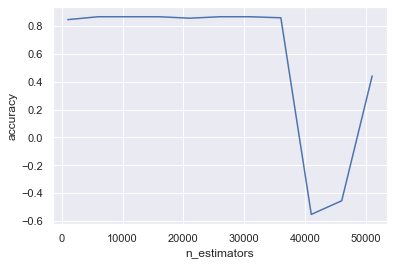

In [3]:
from sklearn.neural_network import MLPRegressor

scores = []
best_val = 0
best_score = 0
maxIters = np.arange(1000, 52000, 5000)

for maxIter in maxIters:
    start_time = time.time()
    model = MLPRegressor(max_iter=maxIter, random_state=random_state, batch_size=90)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    used_time = time.time() - start_time
    if score > best_score:
        best_score = score
        best_val = maxIter
    print(maxIter, score, used_time)

fig = sns.lineplot(x=maxIters, y=scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)


10 0.8246884203147661 301.22169280052185
20 0.8325574995069052 142.84587907791138
30 0.8414965646360524 122.25783276557922
40 0.8374435227381412 127.13554811477661
50 0.8404383200636839 204.45287585258484
60 0.844241034865338 186.86096000671387
70 0.8660658598063686 100.02502083778381
80 0.8432958548610016 128.2275321483612
90 0.8672671007657053 46.13989591598511
100 0.8307153786065453 172.63670110702515
110 0.8426044342787927 134.8183627128601
120 0.8404500024082969 142.34254693984985
130 0.826573403080618 190.1394259929657
140 0.8323801265175786 162.34200811386108
best_val   =  90
best_score =  0.8672671007657053


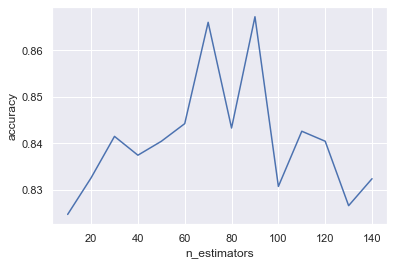

In [6]:
#Grösser 35000 reicht aus
# Die "relu" activation ergibt die Besten Werte
scores = []
best_val = 0
best_score = 0
batch_sizes = np.arange(10, 150, 10)

for batch_size in batch_sizes:
    start_time = time.time()
    model = MLPRegressor(max_iter=35000, random_state=random_state, batch_size=batch_size)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    used_time = time.time() - start_time
    if score > best_score:
        best_score = score
        best_val = batch_size
    print(batch_size, score, used_time)

fig = sns.lineplot(x=batch_sizes, y=scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)

In [ ]:
# best batchsize is 90

start_time = time.time()
model = MLPRegressor(max_iter=35000, random_state=random_state, batch_size=90)
model.fit(X_train_sc, y_train)
score = model.score(X_test_sc, y_test)
used_time = time.time() - start_time
print(score, used_time)